##  Flow


[Test 1 Result](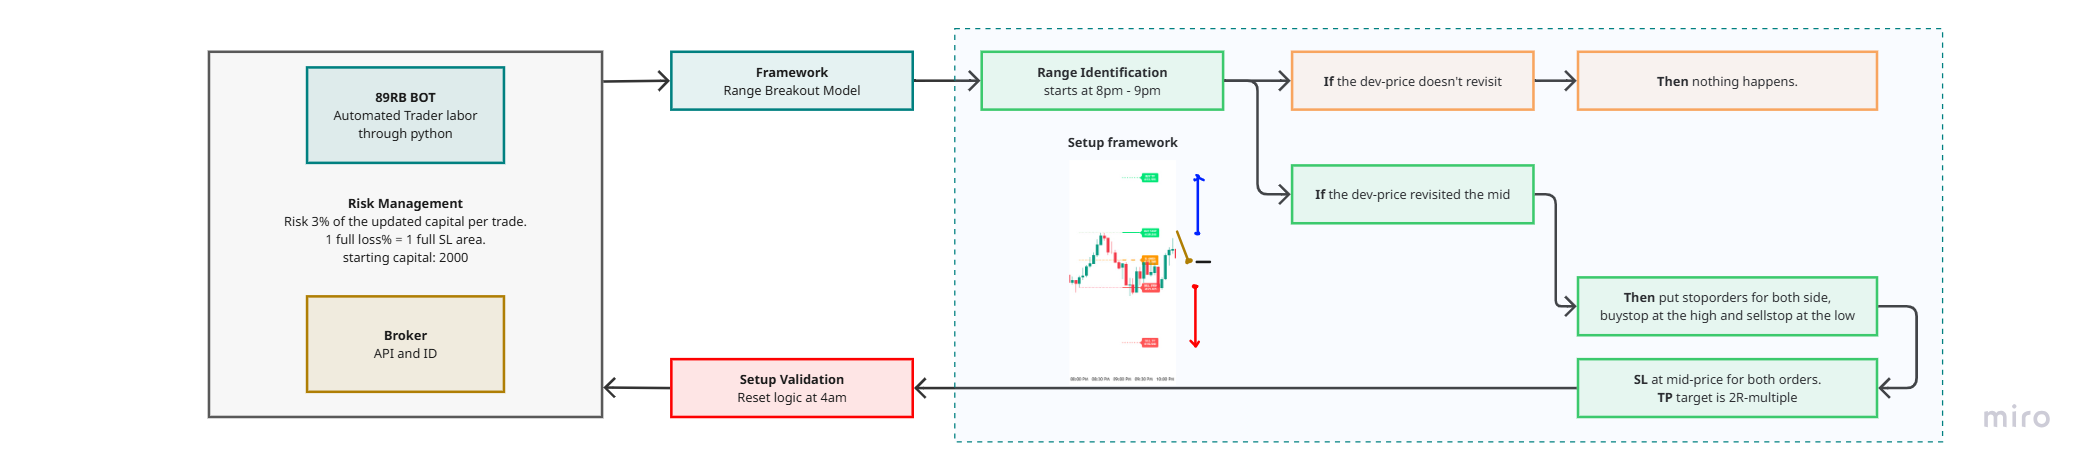)


##  About

| Property             | Details                                    |
|---------------------|-------------------------------------------|
| **Ticker/Instrument** | XAUUSD                                     |
| **Broker**            | OANDA (TradingView only)                  |
| **Timeframe**         | Non-specific                               |
| **Timezone**          | Asia/Manila (UTC+8)                        |
| **Session**           | New York (customed 1h)                    |
| **Method**            | Range Breakout                             |

##  Details

Locate the x-y coordinate of candles formed from 8pm to 9pm (20 oclock in asianmanila timeframe).

Among these candles, find the highest point and lowest point, and make vertical lines until it makes a rectangle from those vertices. This will serve as range.
   
    ┌──────────────  sessionHigh
    │
    │   ████  ← 8PM–9PM candles
    │
    └──────────────  sessionLow

Locate the y-coordinate and mark the high, low, and midpoit of the range.

    ┌────────────── HIGH   (green)
    │   ████
    │   ████
     ────────────── MID    (orange)
    │   ████
    │   ████
    └────────────── LOW    (red)

The high will serve as buystop and to calculate/locate it's TP y-coordinate, absolute value of high minus mid and times it by two, then add it to the high(buystop price) to project the y-coordinate of it's TP. 

Inverse the logic or mirror it for the sellstop.

The midpoint will serve as SL for both orders.

**One range one setup two orders four outcomes** 

    ─────────────── TP
    
    
    
     
     
    ┌─────────────► buystop
    │    ████    │
    │    ████    │
     ────────────── SL
    │    ████    │
    │    ████    │
    └─────────────► sellstop
    
       
    
    
    
    ─────────────── TP

locate and highlight the candle at 4am. This will serve as the validation for the setup.

In [ ]:
//Pinescript Indicator
//@version=5
indicator("8PM–9PM Range Strategy (Midpoint as SL) + 4AM Candle", overlay=true, max_lines_count=500, max_labels_count=500, max_boxes_count=200)

// SETTINGS
tz = "Asia/Manila"
startHour = 20
endHour   = 21

// TIME DETECTION
barHour = hour(time, tz)
barMin  = minute(time, tz)
inSession    = barHour >= startHour and barHour < endHour
sessionOpen  = barHour == startHour and barMin == 0
sessionClose = barHour == endHour and barMin == 0

// TRACK RANGE DURING SESSION
var float sHigh = na
var float sLow  = na
var int   sStart = na
var int   sEnd   = na
var box   sBox = na

if sessionOpen
    sHigh := high
    sLow  := low
    sStart := bar_index
    sEnd := na

if inSession
    sHigh := math.max(sHigh, high)
    sLow  := math.min(sLow, low)

if sessionClose and not na(sHigh)
    sEnd := bar_index

    // RANGE BOX
    if not na(sBox)
        box.delete(sBox)
    sBox := box.new(
         left = sStart,
         right = sEnd,
         top = sHigh,
         bottom = sLow,
         bgcolor = color.new(#000000, 85),
         border_color = color.new(#000000, 0))

    // CORE LEVELS
    mid = (sHigh + sLow) / 2

    // BUY & SELL SETUPS
    buyStop = sHigh
    buySL   = mid
    buyTP   = sHigh + (math.abs(sHigh - mid) * 2)

    sellStop = sLow
    sellSL   = mid
    sellTP   = sLow - (math.abs(mid - sLow) * 2)

    // DRAW RANGE LINES
    line.new(sStart, sHigh, sEnd, sHigh, color=color.new(color.green, 0), style=line.style_dotted)
    line.new(sStart, sLow,  sEnd, sLow,  color=color.new(color.red, 0),   style=line.style_dotted)
    line.new(sStart, mid,   sEnd, mid,   color=color.new(color.orange, 0), style=line.style_dotted)

    // DRAW BUY SETUP
    line.new(sEnd, buyStop, sEnd + 5, buyStop, color=color.new(color.lime, 0), width=2)
    line.new(sEnd, buySL,   sEnd + 5, buySL,   color=color.new(color.orange, 0), width=2, style=line.style_dashed)
    line.new(sEnd, buyTP,   sEnd + 5, buyTP,   color=color.new(color.lime, 0), width=2, style=line.style_dotted)

    label.new(sEnd + 5, buyStop, text=str.format("BUY STOP\n{0}", str.tostring(buyStop, format.mintick)), style=label.style_label_left, color=color.new(color.lime, 0), textcolor=color.white, size=size.tiny)
    label.new(sEnd + 5, buySL,   text=str.format("SL (MID)\n{0}",   str.tostring(buySL,   format.mintick)), style=label.style_label_left, color=color.new(color.orange, 0), textcolor=color.white, size=size.tiny)
    label.new(sEnd + 5, buyTP,   text=str.format("BUY TP\n{0}",     str.tostring(buyTP,   format.mintick)), style=label.style_label_left, color=color.new(color.lime, 0), textcolor=color.white, size=size.tiny)

    // DRAW SELL SETUP
    line.new(sEnd, sellStop, sEnd + 5, sellStop, color=color.new(color.red, 0), width=2)
    line.new(sEnd, sellSL,   sEnd + 5, sellSL,   color=color.new(color.orange, 0), width=2, style=line.style_dashed)
    line.new(sEnd, sellTP,   sEnd + 5, sellTP,   color=color.new(color.red, 0), width=2, style=line.style_dotted)

    label.new(sEnd + 5, sellStop, text=str.format("SELL STOP\n{0}", str.tostring(sellStop, format.mintick)), style=label.style_label_left, color=color.new(color.red, 0), textcolor=color.white, size=size.tiny)
    label.new(sEnd + 5, sellSL,   text=str.format("SL (MID)\n{0}",  str.tostring(sellSL,   format.mintick)), style=label.style_label_left, color=color.new(color.orange, 0), textcolor=color.white, size=size.tiny)
    label.new(sEnd + 5, sellTP,   text=str.format("SELL TP\n{0}",   str.tostring(sellTP,   format.mintick)), style=label.style_label_left, color=color.new(color.red, 0), textcolor=color.white, size=size.tiny)

// 4AM CANDLE HIGHLIGHT
is4am = barHour == 4 and barMin == 0
var box box4am = na
if is4am
    if not na(box4am)
        box.delete(box4am)
    box4am := box.new(left = bar_index, right = bar_index + 1, top = high, bottom = low, bgcolor = color.new(color.blue, 75), border_color = color.new(color.blue, 0))
    label.new(bar_index, high, "4 AM", style=label.style_label_down, color=color.new(color.blue, 0), textcolor=color.white, size=size.tiny)


##  **Setup Overview:**  
This framework defines the conditions for executing the trading strategy.

![Template](https://github.com/algorembrant/Pinescript.TradingView-Indicators.and.Strategies/blob/main/Images/Screenshot%202025-11-12%20144500.png)

---

## Rules

1. Use **Asia/Manila timezone (UTC+8)**.  
2. Identify the **8 PM – 9 PM price range**.  
3. Candles outside this range will guide trading decisions.  
4. The developing price (including wicks) **must revisit the mid-price** of the range before proceeding.  
5. Once the mid-price is revisited:  
   - Place a **Buy Stop** at the range **high**.  
   - Place a **Sell Stop** at the range **low**.  
6. **Take Profit (TP):** 2R multiple from the entry.  
7. **Stop Loss (SL):** mid-price for both Buy Stop and Sell Stop.  
8. Both Buy Stop and Sell Stop **may trigger** in the same setup, valid until the **4 AM candle**.  
9. Maximum outcomes per setup: **2 wins, 2 losses, or a mix**.  
10. If the trade hasn’t hit any target by 4 AM, **cancel the orders**.  

## Risk Management

- Starting capital: **$2,000**  
- Risk per trade: **3% of current capital** (applies separately to Buy Stop and Sell Stop).  

In [ ]:
//Pinescript Strategy
//@version=5
strategy("8PM–9PM Range Strategy + 4AM Candle", overlay=true, initial_capital=2000)

// TIME SETTINGS
tz = "Asia/Manila"
startHour = 20
endHour   = 21
riskPerc = 3.0

barHour = hour(time, tz)
barMin  = minute(time, tz)
inSession = barHour >= startHour and barHour < endHour
sessionOpen = barHour == startHour and barMin == 0
sessionClose = barHour == endHour and barMin == 0
is4am = barHour == 4 and barMin == 0

// RANGE VARIABLES (from indicator)
var float sHigh = na
var float sLow  = na
var int sStart = na
var int sEnd   = na
var bool touchedMid = false
var bool ordersPlaced = false

if sessionOpen
    sHigh := high
    sLow  := low
    sStart := bar_index
    sEnd := na
    touchedMid := false
    ordersPlaced := false

if inSession
    sHigh := math.max(sHigh, high)
    sLow  := math.min(sLow, low)

if sessionClose and not na(sHigh)
    sEnd := bar_index

// USE INDICATOR COORDINATES
mid = (sHigh + sLow)/2
buyStop  = sHigh
buySL    = mid
buyTP    = sHigh + 2*(sHigh - mid)
sellStop = sLow
sellSL   = mid
sellTP   = sLow - 2*(mid - sLow)

// DETECT MID TOUCH (entry condition)
if not na(mid) and not ordersPlaced
    if high >= mid and low <= mid
        touchedMid := true

// PLACE ORDERS BASED ON INDICATOR COORDINATES
if touchedMid and not ordersPlaced
    riskAmount = strategy.equity * riskPerc / 100.0

    stopDistBuy = math.abs(buyStop - buySL)
    stopDistSell = math.abs(sellStop - sellSL)
    qtyBuy = stopDistBuy > 0 ? math.max(1, math.round(riskAmount / stopDistBuy)) : 0
    qtySell = stopDistSell > 0 ? math.max(1, math.round(riskAmount / stopDistSell)) : 0

    if qtyBuy > 0
        strategy.entry("BUY_STOP", strategy.long, qty=qtyBuy, stop=buyStop)
        strategy.exit("EXIT_BUY", from_entry="BUY_STOP", stop=buySL, limit=buyTP)

    if qtySell > 0
        strategy.entry("SELL_STOP", strategy.short, qty=qtySell, stop=sellStop)
        strategy.exit("EXIT_SELL", from_entry="SELL_STOP", stop=sellSL, limit=sellTP)

    ordersPlaced := true

// CANCEL / CLOSE ORDERS AT 4AM
if is4am
    strategy.cancel("BUY_STOP")
    strategy.cancel("SELL_STOP")
    if strategy.position_size > 0
        strategy.close("BUY_STOP")
    if strategy.position_size < 0
        strategy.close("SELL_STOP")
    touchedMid := false
    ordersPlaced := false


## Implementation Note

Use the **y-coordinates from the indicator** to calculate the range, entries, SL, and TP targets.

![Strategy Example](https://github.com/algorembrant/Pinescript.TradingView-Indicators.and.Strategies/blob/main/Images/Screenshot%202025-11-15%20131419.png?raw=true)

---

##  Result

![Test 1 Result](https://github.com/algorembrant/Pinescript.TradingView-Indicators.and.Strategies/blob/main/Images/Screenshot%202025-11-15%20132923.png?raw=true)

## Test 1: Notice 

| Topic / Flaws       | Details                                                                                                             | Status       |
|--------------------|---------------------------------------------------------------------------------------------------------------------|-------------|
| **Position sizing** | The bot does not fully account for P&L when sizing positions. For example, it risks 3% per trade, but the loss can exceed this and gains may exceed 6%. | Unresolved  |
| **R-multiple**      | Trades indicate the possibility of reaching a 4R multiple upon review.                                             | Unresolved  |
| **Win rate**        | The current win rate is 40–43%, which is lower than ideal.                                                          | Unresolved  |

This strategy is naturally profitable, but I aim to **increase the R-multiples and win rate** through additional testing.

---

## Adjustments

Getting higher R-multiple. 